# 3 Data Preparation

## Overview
Following our Data Understanding phase, we now transition into the Data Preparation stage of the CRISP-DM methodology. This phase is crucial in transforming raw data into a clean and structured format that can be used effectively in analysis and modeling.

The tasks in this section include:
- Selecting relevant tables and columns.
- Handling missing or inconsistent data.
- Converting data types (e.g., dates, floats, integers).
- Creating derived attributes where necessary (e.g., year of release from a full date).
- Merging datasets appropriately based on relationships (e.g., `movie_id`, `person_id`).
- Filtering and sampling records for exploratory and predictive tasks.

## Goals
- Ensure the dataset is clean, consistent, and analysis-ready.
- Retain only data relevant to our business objectives.
- Prepare a consolidated and structured dataset for feature engineering and modeling in subsequent phases.

In [1]:
# importing the relevant libraries

# The core libraries
import numpy as np
import pandas as pd
import sqlite3

# Visualization labraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For data cleaning 
from datetime import datetime # For date parsing
import re   # For regular expressions (cleaning strings, removing symbols)
import warnings
warnings.filterwarnings('ignore')

# 3.1 Data Cleaning of The Numbers Movie Budgets Data

In [2]:
# loading the dataset into a dataframe
df_movie_budget = pd.read_csv("Data/tn.movie_budgets.csv")

#previewing the first 5 rows
df_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#checking the column names
df_movie_budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### Observation

We note that the column names are standardised in lower case. Given the movie name is common in most of the other datasets, we can rename it to primary_title for uniformity

In [4]:
# standardising the movie column name
df_movie_budget.rename(columns={"movie":"primary_title"}, inplace=True)

# rechecking the column names
df_movie_budget.columns

Index(['id', 'release_date', 'primary_title', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [5]:
# checking the summary information on the dataframe
df_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   primary_title      5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Observation

There is a need for converting the datatypes to the correct format as follows:

* The column for the 'Release date' should be in a date time format
* The 'Production_budget', 'Domestic_gross', and 'Worldwide_gross' should be integers since they all reference money and in dollars. 

In [6]:
# Cloning the dataset for cleaning purposes
df_movie_budget_1 = df_movie_budget.copy()

In [7]:
# Converting release_date to date_time format
df_movie_budget_1['release_date'] = pd.to_datetime(df_movie_budget_1['release_date'])

# Checking if the changes were effected
df_movie_budget_1.dtypes

id                            int64
release_date         datetime64[ns]
primary_title                object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

In [8]:
# To remove the $ sign and commas in the numbers, and Converting to float
the_columns = ['production_budget','domestic_gross','worldwide_gross']
df_movie_budget_1[the_columns] = df_movie_budget_1[the_columns].replace({'\$': '', ',': ''}, regex=True).astype(float)

#checking if the changes were effected
df_movie_budget_1.dtypes 

id                            int64
release_date         datetime64[ns]
primary_title                object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

### Observation

The dataset is now having all the data in the correct format for any use in analysis

In [9]:
df_movie_budget_1['primary_title'].value_counts()

Halloween                              3
Home                                   3
King Kong                              3
Friday the 13th                        2
The Last House on the Left             2
                                      ..
9                                      1
What's the Worst That Could Happen?    1
Entourage                              1
Love and Other Drugs                   1
My Date With Drew                      1
Name: primary_title, Length: 5698, dtype: int64

### Observation

We note that the movie title is not unique given there are movies produced over the years with similar titles for example 3 different movies called Halloween with different release dates. If using movie titles for merging datasets we may need to link it with release date so as to make it unique.

We also note that we may need to standardise the movie names into Title Case.

In [10]:
#standardising the movie title to title case
df_movie_budget_1['primary_title'].str.title()

#checking the first 10 to see if changes have been effected
df_movie_budget_1['primary_title'].head(10)

0                                         Avatar
1    Pirates of the Caribbean: On Stranger Tides
2                                   Dark Phoenix
3                        Avengers: Age of Ultron
4              Star Wars Ep. VIII: The Last Jedi
5           Star Wars Ep. VII: The Force Awakens
6                         Avengers: Infinity War
7     Pirates of the Caribbean: At Worldâs End
8                                 Justice League
9                                        Spectre
Name: primary_title, dtype: object

In [11]:
#checking the unique values for each column
df_movie_budget_1.nunique()

id                    100
release_date         2418
primary_title        5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

### Observation

We note that the id column is not unique. It has only 100 unique values so to make it unique we can parse the range of the dataset to create a unique id column.

In [12]:
# Changing the id column to make it unique
df_movie_budget_1['id']= range(1, len(df_movie_budget_1) +1)

# Check if the column is unique
df_movie_budget_1.nunique()

id                   5782
release_date         2418
primary_title        5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [13]:
#checking for missing values
df_movie_budget_1.isnull().sum()

id                   0
release_date         0
primary_title        0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
# Check for duplicates
df_movie_budget_1.duplicated().sum()

0

### Observation

The dataset has no missing values and duplicates hence no further cleaning is required. We can now do some feature engineering.

## 3.1.1 Feature engineering for the Movie Budget dataset

Using the worldwide gross and domestic gross columns we can come up with a foreign gross and profit/loss columns and ROI columns. 

Using the release date we can come up with the release year and release month.

#### A. Foreign Gross

This can be used to compare earnings from the domestic and foreign market and how well a movie performed in the different markets.

In [15]:
# computing foreign gross = worldwide gross - domestic gross
df_movie_budget_1['foreign_gross'] = df_movie_budget_1['worldwide_gross'] - df_movie_budget_1['domestic_gross']

#for display of the figures with commas
pd.options.display.float_format = '{:,.0f}'.format

#checking the first 5
df_movie_budget_1['foreign_gross'].head()

0   2,015,837,654
1     804,600,000
2     107,000,000
3     944,008,095
4     696,540,365
Name: foreign_gross, dtype: float64

#### B. Profit/Loss

This indicates the net gain/loss from production. We can also calculate domestic profit and foreign profit.

In [16]:
# computing total profit/loss
df_movie_budget_1['total_profit/loss'] = df_movie_budget_1['worldwide_gross'] - df_movie_budget_1['production_budget']

# computing domestic profit/loss
df_movie_budget_1['domestic_profit/loss'] = df_movie_budget_1['domestic_gross'] - df_movie_budget_1['production_budget']

# computing foreign profit/loss
df_movie_budget_1['foreign_profit/loss'] = df_movie_budget_1['foreign_gross'] - df_movie_budget_1['production_budget']

#checking the first 5
df_movie_budget_1['total_profit/loss'].head()

0   2,351,345,279
1     635,063,875
2    -200,237,650
3   1,072,413,963
4     999,721,747
Name: total_profit/loss, dtype: float64

#### C. Return on Investment (ROI)

This helps determine the efficiency of spending and can be used for business comparison.

In [17]:
#computing ROI = profit_loss/budget
df_movie_budget_1["ROI"] = df_movie_budget_1["total_profit/loss"] / df_movie_budget_1["production_budget"]

#previewing the first 5
df_movie_budget_1["ROI"].head()

0    6
1    2
2   -1
3    3
4    3
Name: ROI, dtype: float64

#### D. Release Year and Month

Useful for analyzing performance trends over time (e.g., seasonality effects).

In [18]:
# extracting release year
df_movie_budget_1['release_year'] = df_movie_budget_1['release_date'].dt.year 

#extracting release month
df_movie_budget_1['release_month'] = df_movie_budget_1['release_date'].dt.month_name()

#previewing the entire dataset
df_movie_budget_1.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279","2,015,837,654","2,351,345,279","335,507,625","1,590,837,654",6,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","804,600,000","635,063,875","-169,536,125","394,000,000",2,2011,May
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350","107,000,000","-200,237,650","-307,237,650","-243,000,000",-1,2019,June
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963","944,008,095","1,072,413,963","128,405,868","613,408,095",3,2015,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747","696,540,365","999,721,747","303,181,382","379,540,365",3,2017,December


#### E. Domestic/Foreign Revenue Share

Useful for understanding market performance differences.

In [19]:
# computing domestic share
df_movie_budget_1["domestic_share%"] = (df_movie_budget_1['domestic_gross'] / df_movie_budget_1['worldwide_gross']) * 100

#computing foreign share
df_movie_budget_1["foreign_share%"] = (df_movie_budget_1['foreign_gross'] / df_movie_budget_1['worldwide_gross']) * 100

#previewing the entire dataset
df_movie_budget_1.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month,domestic_share%,foreign_share%
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279","2,015,837,654","2,351,345,279","335,507,625","1,590,837,654",6,2009,December,27,73
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","804,600,000","635,063,875","-169,536,125","394,000,000",2,2011,May,23,77
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350","107,000,000","-200,237,650","-307,237,650","-243,000,000",-1,2019,June,29,71
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963","944,008,095","1,072,413,963","128,405,868","613,408,095",3,2015,May,33,67
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747","696,540,365","999,721,747","303,181,382","379,540,365",3,2017,December,47,53


#### F. Budget Categories

This will help group movies for stratified analysis or visualisations.

In [20]:
#creating budget category 
df_movie_budget_1['budget_category'] = pd.cut(df_movie_budget_1['production_budget'], 
                                bins=[0, 10000000, 50000000, 100000000, float('inf')],
                                labels=['Low Budget', 'Mid Budget', 'High Budget', 'Blockbuster'])

df_movie_budget_1.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month,domestic_share%,foreign_share%,budget_category
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279","2,015,837,654","2,351,345,279","335,507,625","1,590,837,654",6,2009,December,27,73,Blockbuster
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","804,600,000","635,063,875","-169,536,125","394,000,000",2,2011,May,23,77,Blockbuster
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350","107,000,000","-200,237,650","-307,237,650","-243,000,000",-1,2019,June,29,71,Blockbuster
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963","944,008,095","1,072,413,963","128,405,868","613,408,095",3,2015,May,33,67,Blockbuster
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747","696,540,365","999,721,747","303,181,382","379,540,365",3,2017,December,47,53,Blockbuster


#### E. Profitability Flag
Binary feature that simplifies classification tasks — e.g., predicting whether a movie will be profitable.

In [21]:
#creating profitability flag
df_movie_budget_1['is_profitable'] = (df_movie_budget_1['total_profit/loss'] > 0).astype(int)

#previewing the first 5 rows
df_movie_budget_1.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month,domestic_share%,foreign_share%,budget_category,is_profitable
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279","2,015,837,654","2,351,345,279","335,507,625","1,590,837,654",6,2009,December,27,73,Blockbuster,1
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","804,600,000","635,063,875","-169,536,125","394,000,000",2,2011,May,23,77,Blockbuster,1
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350","107,000,000","-200,237,650","-307,237,650","-243,000,000",-1,2019,June,29,71,Blockbuster,0
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963","944,008,095","1,072,413,963","128,405,868","613,408,095",3,2015,May,33,67,Blockbuster,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747","696,540,365","999,721,747","303,181,382","379,540,365",3,2017,December,47,53,Blockbuster,1


### Saving the cleaned dataset

In [22]:
#saving the cleaned dataset
df_movie_budget_1.to_csv('Data/Cleaned_tn_movie_budget.csv', index=False)

# 3.2 Cleaning of IMDb Database 

In [23]:
# Accessing the IMDb data
conn= sqlite3.connect("Data/im.db")
df_IMDB_table = pd.read_sql("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table'
;""",conn)

df_IMDB_table 

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


From here we'll do the cleaning one table at a time.

## 3.2.1 Cleaning of Movie Basics Table

In [24]:
# Here we start cleaning the movie_basics table 
# We start by loading the table
dfmb = pd.read_sql("""
SELECT *
FROM movie_basics
;""",conn)
dfmb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116,None


In [25]:
# Checking the data types in the mvie basics table
dfmb.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

### Observation

We note that the columns are in the appropriate datatypes hence no cleaning required.

### Missing values

In [26]:
# Checking for missing values
dfmb.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

#### Observation

We note that the table has some missing values in the original_title, runtime_minutes and genres columns which we can handle by imputing. 

### Dealing with missing values for runtime minutes

In [27]:
dfmb.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,"146,144","2,015",3,"2,010","2,012","2,015","2,017","2,115"
runtime_minutes,"114,405",86,166,1,70,87,99,"51,420"


#### Observation

We note that the mean and median are relatively close for runtime minutes therefore showing that we could use either the mean, median or mode to impute the run time minutes. In this case we choose to impute with the median.

In [28]:
# Fill in the missing data using the mode
dfmb['runtime_minutes'] = dfmb['runtime_minutes'].fillna(dfmb['runtime_minutes'].median())

# Checking if the missing data is still there
dfmb.isna().sum()

movie_id              0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

### Dealing with missing values for original title

Given we have all data for the primary title, we can fill the missing original title with the primary title.

In [29]:
# Fill in the data on original title with the data from primary title
dfmb['original_title'] = dfmb['original_title'].fillna(dfmb['primary_title'])

# Recheck for missing data
dfmb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

### Dealing with missing values for genre

In [30]:
# Count missing values
missing_genres = dfmb['genres'].isnull().sum()
total = dfmb.shape[0]
print(f"Missing genres: {missing_genres} out of {total} rows ({missing_genres/total:.2%})")

Missing genres: 5408 out of 146144 rows (3.70%)


In [31]:
# The idea for the genres column is to assess a relationship between genres and runtime. 
# Start by checking for unique values in genres
dfmb['genres'].nunique()

1085

In [32]:
dfmb.describe(include="O").T

,count,unique,top,freq
movie_id,146144,146144,tt0063540,1
primary_title,146144,136071,Home,24
original_title,146144,137787,Broken,19
genres,140736,1085,Documentary,32185


In [33]:
# Checking for a trend between genres and runtime
dfmb.groupby('genres')['runtime_minutes'].median().sort_values()


genres
Comedy,Short                     1
Animation,Documentary,Horror     4
Documentary,Mystery,Romance      7
Drama,Horror,Short               7
Animation,Documentary,Sci-Fi    10
                                ..
Adventure,Horror,Romance       145
Adventure,Animation,Crime      157
Musical,Romance,Thriller       165
History,Musical,Romance        174
Biography,Mystery,Sci-Fi       220
Name: runtime_minutes, Length: 1085, dtype: float64

In [34]:
# To get median runtime for genres
genre_runtime_map = dfmb.groupby('genres')['runtime_minutes'].median().dropna()

In [35]:
# We then create a function to guess the genre from runtime
def guess_genre(runtime):
    if pd.isna(runtime):
        return np.nan
    # Find the genre whose median runtime is closest
    return genre_runtime_map.abs()\
        .sub(runtime).abs()\
        .idxmin()

In [36]:
# Fill in the missing genres
dfmb['genres'] = dfmb.apply(lambda row: guess_genre(row['runtime_minutes']) if pd.isna(row['genres']) else row['genres'], axis=1)

In [37]:
# Check that there aren't any missing values in the movie basics table 
dfmb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [38]:
# Checking for duplicates
dfmb.duplicated().sum()

0

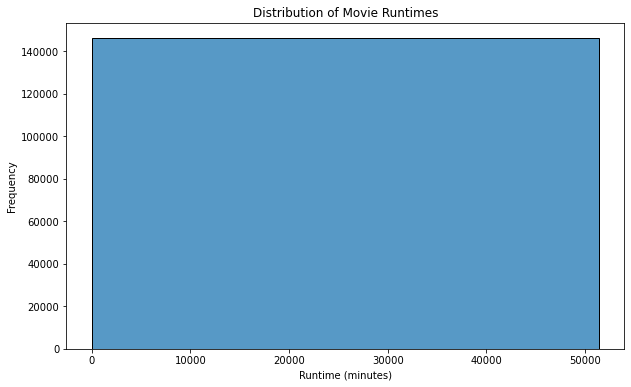

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

runtime_data = dfmb["runtime_minutes"]
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(runtime_data, bins=1)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


## 3.2.2 Cleaning the Directors table 

In [39]:
# Here we start cleaning the directors table 
# We start by loading the table 
df_dir = pd.read_sql("""
SELECT *
FROM directors
;""",conn)
df_dir


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [40]:
# Checking the data types in the table
df_dir.dtypes

movie_id     object
person_id    object
dtype: object

In [41]:
# Checking for missing data
df_dir.isna().sum()

movie_id     0
person_id    0
dtype: int64

In [42]:
#checking for duplicates
df_dir.duplicated().sum()

127639

In [80]:
#dropping the duplicates
df_dir.drop_duplicates(inplace=True)

#re-checking for duplicates
df_dir.duplicated().sum()

0

In [81]:
df_dir.shape

(163535, 2)

### Observation
From the above, after dropping the duplicates, nothing needs standardizing, and there aren't any missing values, therefore we move to the next table.

## 3.2.3 Cleaning the Known For table

In [43]:
# Here we start cleaning the known_for table 
# We start by loading the table 
df_known = pd.read_sql("""
SELECT *
FROM known_for
;""",conn)
df_known

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [44]:
# checking for the data types in the column to assess whether standardization is necessary
df_known.dtypes

person_id    object
movie_id     object
dtype: object

In [45]:
# Checking for null values
df_known.isna().sum()

person_id    0
movie_id     0
dtype: int64

In [46]:
df_known.duplicated().sum()

0

### Observation
Nothing needs to be done in the above table as well.

## 3.2.4  Cleaning the Movie AKAs Table

In [47]:
# We start by loading the table 
df_akas = pd.read_sql("""
SELECT *
FROM movie_akas
;""",conn)
df_akas.tail()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0
331700,tt9880178,1,La atención,None,None,original,None,1
331701,tt9880178,2,La atención,ES,None,None,None,0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,None,0


In [48]:
#checking the column datatypes
df_akas.dtypes

movie_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

In [49]:
#checking the null values
df_akas.isnull().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [50]:
# Lets check the percentage of missing data
(df_akas.isnull().sum()/len(df_akas)) * 100 

movie_id             0
ordering             0
title                0
region              16
language            87
types               49
attributes          96
is_original_title    0
dtype: float64

In [51]:
# Drop columns that are too sparse - have more than 50% missing values
df_akas.drop(columns=['language', 'attributes'], inplace=True)

In [52]:
# Fill missing values in is_original_title with 0
df_akas['is_original_title'] = df_akas['is_original_title'].fillna(0)

# changing column data type to integer
df_akas['is_original_title'] = df_akas['is_original_title'].astype(int)

In [53]:
# drop rows with missing 'region'
df_akas = df_akas[df_akas['region'].notnull()]

In [54]:
#rechecking the null values
df_akas.isnull().sum()

movie_id                  0
ordering                  0
title                     0
region                    0
types                159603
is_original_title         0
dtype: int64

In [55]:
df_akas.duplicated().sum()

0

## 3.2.5  Cleaning the Movie Ratings table

In [56]:
# Here we start cleaning the movie_basics table 
# We start by loading the table 
df_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;""",conn)
df_ratings 


,movie_id,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21
...,...,...,...
73851,tt9805820,8,25
73852,tt9844256,8,24
73853,tt9851050,5,14
73854,tt9886934,7,5


In [57]:
# Checking the data types in the table
df_ratings.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

In [58]:
#checking for null values
df_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [59]:
df_ratings.duplicated().sum()

0

## 3.2.6 Cleaning the Persons table

In [60]:
# We start by loading the table 
df_persons = pd.read_sql("""
SELECT *
FROM persons
;""",conn)
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [61]:
df_persons.dtypes

person_id              object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
dtype: object

In [62]:
df_persons.isnull().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [63]:
# The most noticeable thing is the mssing data in the birt and death year columns
# Lets check the percentage of missing data
(df_persons.isnull().sum()/len(df_persons)) * 100 


person_id             0
primary_name          0
birth_year           86
death_year           99
primary_profession    8
dtype: float64

In [64]:
#  With 86% and 98% missing data, its best to drop the two columns
df_persons1 = df_persons.drop(['birth_year','death_year'], axis=1)
df_persons1.isna().sum()

person_id                 0
primary_name              0
primary_profession    51340
dtype: int64

In [65]:
# Considering that only 8% of the primary profession column is missing we can fill it in using the mode
df_persons1['primary_profession'] = df_persons1['primary_profession'].fillna(df_persons1['primary_profession'].mode()[0])
# Check of the changes took
df_persons1.isna().sum()

person_id             0
primary_name          0
primary_profession    0
dtype: int64

## 3.2.7 Checking the Principals table

In [66]:
# We start by loading the table 
df_principals = pd.read_sql("""
SELECT *
FROM principals
;""",conn)
df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [67]:
df_principals.isnull().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

In [68]:
# Lets check the percentage of missing data
(df_principals.isnull().sum()/len(df_principals)) * 100 

movie_id      0
ordering      0
person_id     0
category      0
job          83
characters   62
dtype: float64

In [69]:
# How often job is null
df_principals['job'].isnull().mean()

0.8271869097614634

### Interpretation:
This means 82% of the job column is null.

So only 18% of the rows have actual values in the job column.

This is a strong indicator that the column is mostly empty and possibly not critical.

In [70]:
# Compare job and category when job is not null
df_principals[df_principals['job'].notnull()][['category', 'job']].drop_duplicates().sort_values(by='category')

,category,job
870399,cinematographer,slow motion director of photography
71248,cinematographer,cinematographer: Korea
391186,cinematographer,lead cinematographer
304709,cinematographer,lead director of photography
188463,cinematographer,cinematographer: London
...,...,...
201192,writer,story and script
201315,writer,based upon the stage play by
201411,writer,adapted from the play by
199132,writer,"verses from poem ""Tribal Ceremony"


### Interpretation:
In some cases, job repeats the category, and doesn't add value. In other cases, job gives extra detail which we may want to retain if we are analyzing crew roles in detail.

Since our analysis does not rely on specific job titles or analyzing crew roles in detail (like distinguishing between "story" and "screenplay"), it’s okay to drop the job category.

In [71]:
# dropping the job column
df_principals.drop(columns='job', inplace=True)

# checking if it has been dropped
df_principals.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'characters'], dtype='object')

In [72]:
# Recheck for missing data
df_principals.isna().sum()

movie_id           0
ordering           0
person_id          0
category           0
characters    634826
dtype: int64

### Interpretation:

634,826 missing out of 1,043,797 rows which means 61% nulls are available in this column. This is expected because only performers (actors/actresses) have values here because it typically lists the character names played by actors or actresses. For crew roles, this column is naturally empty because they do not play characters

The column still holds value if we:

* Want to analyze characters (e.g. lead roles, recurring roles)
* Want to distinguish cast members vs. crew

To keep the column, we can fill the nulls with Not Specified.


In [73]:
# Fill NaNs with a placeholder
df_principals['characters'] = df_principals['characters'].fillna('Not Specified')

# Recheck for missing data
df_principals.isna().sum()

movie_id      0
ordering      0
person_id     0
category      0
characters    0
dtype: int64

## 3.2.8 Cleaning the Writers table

In [74]:
# We start by loading the table 
df_writers = pd.read_sql("""
SELECT *
FROM writers
;""",conn)
df_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [75]:
# Check the data types for standardization
df_writers.dtypes

movie_id     object
person_id    object
dtype: object

In [76]:
#checking for null values
df_writers.isnull().sum()

movie_id     0
person_id    0
dtype: int64

In [77]:
# Checking for duplicates
df_writers.duplicated().sum()

77521

In [78]:
#dropping duplicates
df_writers.drop_duplicates(inplace=True)

# Checking for duplicates
df_writers.duplicated().sum()

0

# Merging the IMDb Database Tables

##  IMDb Database: Simplified Table Relationships

Before merging tables for exploratory data analysis (EDA), it is important to understand how the tables in the IMDb database relate to each other. Below is a simplified relationship diagram highlighting the primary keys and how the tables connect:

| Table Name       | Key Columns                | Description / Links With                                  |
|------------------|----------------------------|------------------------------------------------------------|
| `movie_basics`   | `movie_id`                 | Core movie information: titles, genres, year, runtime. Central hub for most joins. |
| `movie_ratings`  | `movie_id`                 | Contains average rating and number of votes. Join with `movie_basics`. |
| `directors`      | `movie_id`, `person_id`    | Links movies to directors. Join with `movie_basics` and `persons`. |
| `writers`        | `movie_id`, `person_id`    | Links movies to writers. Join with `movie_basics` and `persons`. |
| `principals`     | `movie_id`, `person_id`    | Key cast and crew. Join with `movie_basics` and `persons`. |
| `known_for`      | `movie_id`, `person_id`    | Shows notable works per person. Join with `persons`.       |
| `persons`        | `person_id`                | People data: name, birth/death year, profession. Connects with all person-related tables. |
| `movie_akas`     | `movie_id`                 | Alternative titles, languages, and regions for movies. Join with `movie_basics`. |

###  Merging Strategy
Start with `movie_basics` as the central table, then join additional tables based on your business questions. 

---
